In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 8
fig_height = 6
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcanVsaWFcRG9jdW1lbnRvc1xVTkFMXFNlbWVzdHJlIDIwMjQtbGxcUmVkZXMgbmV1cm9uYWxlcyB5IG1vZGVsb3MgYmlvaW5zaXBpcmFkb3NcQmxvZ1xibG9nXHBvc3RzXG9wdGltaXphY2lvbl9oZXVyaXN0aWNh'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

C:\Users\julia\AppData\Local\Temp\ipykernel_15172\790842915.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\julia\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\importlib\\_bootstrap.py": 1666654448.0, "C:\\Users\\julia\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\importlib\\_bootstrap_external.py": 1666654448.0, "C:\\Users\\julia\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\zipimport.py": 1666654450.0, "C:\\Users\\julia\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\codecs.py": 1666654448.0, "C:\\Users\\julia\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\aliases.py": 1666654448.0, "C:\\Users\\julia\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\__init__.py": 1666654448.0, "C:\\Users\\julia\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\utf_8.py": 1666654448.0, "C:\\Users\\julia\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\cp1252.py": 1666654448.0, "C:\\Users\\julia\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\abc.py": 1666654448.0, "C:\\Users\\julia\\AppData\\Local\\Programs\\Python\\Python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image as IPImage
import io
from PIL import Image

In [3]:
def plot_function(f, x1_range, x2_range, title="Function Plot", x1_point=None, x2_point=None, elev=30, azim=45 ):
    x1 = np.linspace(x1_range[0], x1_range[1], 400)
    x2 = np.linspace(x2_range[0], x2_range[1], 400)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f(np.array([X1,X2]))

    fig = plt.figure(figsize=(8, 4))

    # 3D plot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X1, X2, Z)
    ax1.set_title(f'3D Plot of {title}')
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel('Z')

    ax1.view_init(elev=elev, azim=azim)

    if x1_point is not None and x2_point is not None:
        z_point = f(np.array([x1_point, x2_point])[:, None, None])[0, 0]

        ax1.plot([x1_point], [x2_point], [z_point], color='r', marker='o', markersize=5, linewidth=0, label="Mínimo global", zorder=5)
        ax1.legend()

    # Contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contour(X1, X2, Z, levels = 10)
    ax2.set_title(f'Contour Plot of {title}')
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    fig.colorbar(contour, ax=ax2)

    if x1_point is not None and x2_point is not None:
        ax2.plot([x1_point], [x2_point], color='r', marker='o', markersize=5, linewidth=0, label="Mínimo global", zorder=5)
        ax2.legend()

    plt.show()

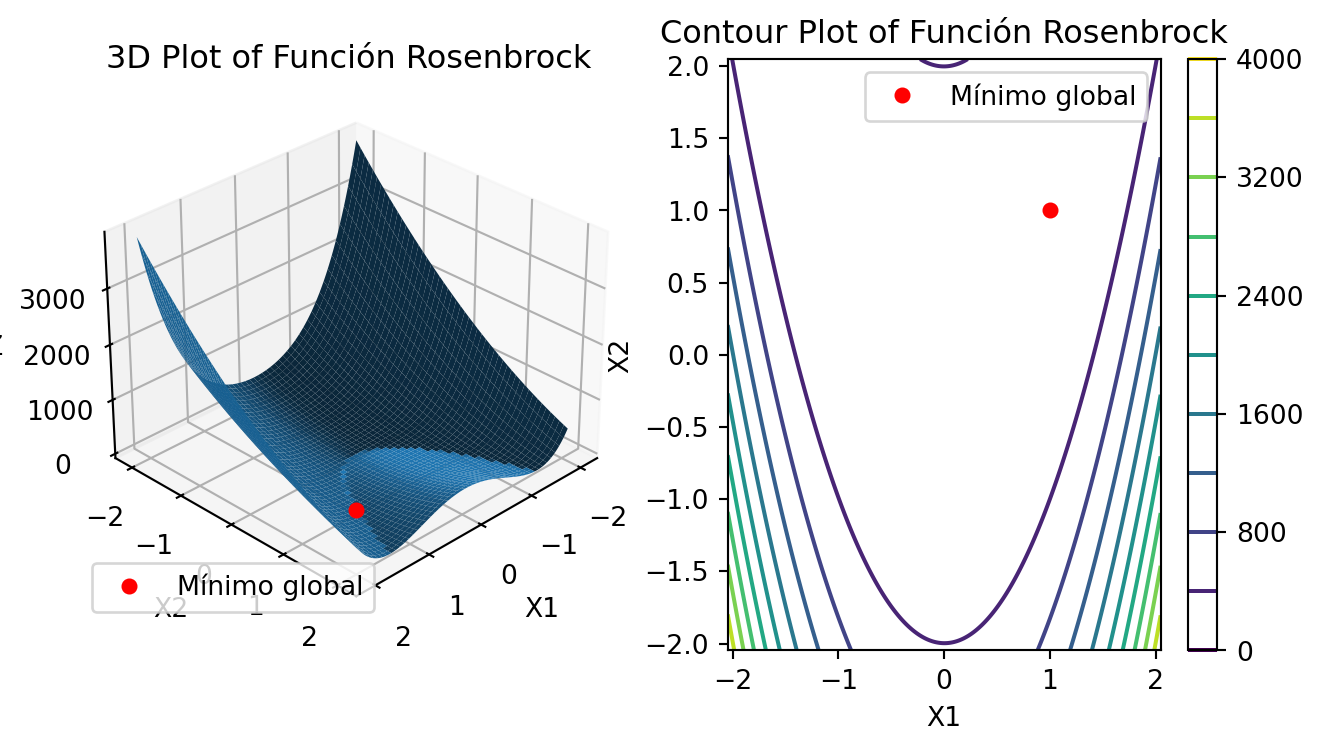

In [4]:
# Función de Rosenbrock
def rosenbrock(x, a=1, b=100):
    """
    Calcula el valor de la función de Rosenbrock.
    x: vector de entrada (numpy array)
    a, b: parámetros de la función
    """
    return (sum(b * (x[1:] - x[:-1]**2)**2 + (x[:-1] - a)**2))

plot_function(rosenbrock, x1_range=(-2.048, 2.048), x2_range=(-2.048, 2.048), title="Función Rosenbrock", x1_point=1, x2_point=1)

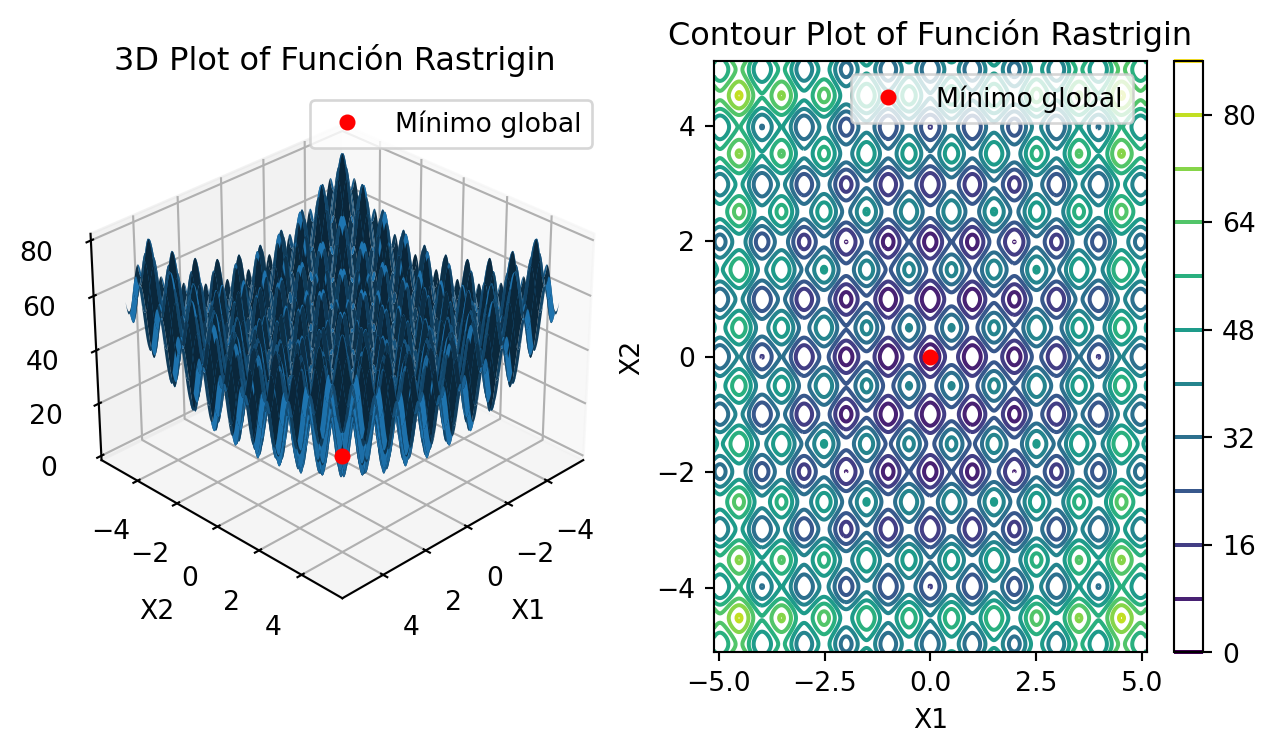

In [5]:
# Función de Rastrigin
def rastrigin(x):
    """
    Calcula el valor de la función de Rastrigin.
    x: vector de entrada (numpy array)
    """
    d = len(x)
    return 10 * d + sum(x**2 - 10 * np.cos(2 * np.pi * x))
plot_function(rastrigin, x1_range=(-5.12, 5.12), x2_range=(-5.12, 5.12), title="Función Rastrigin", x1_point=0, x2_point=0)

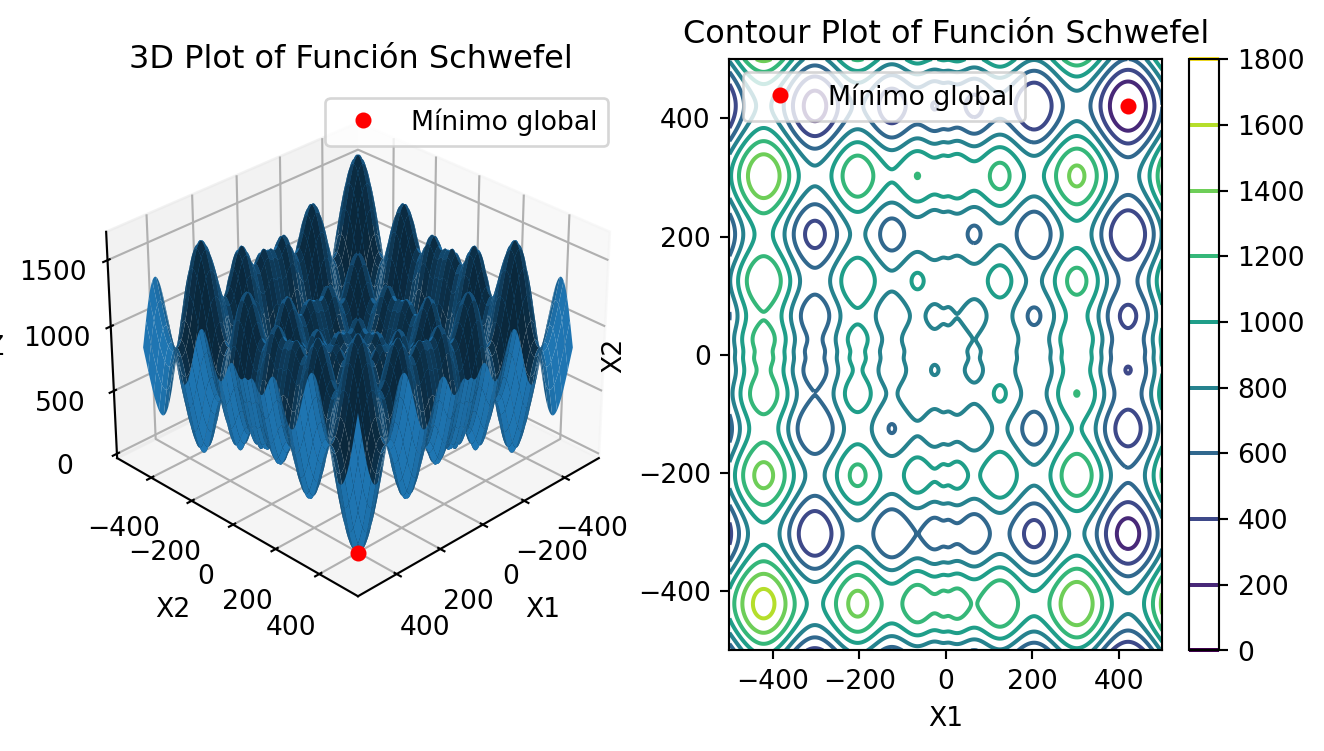

In [6]:
# Función de Schwefel
def schwefel(x):
    """
    Calcula el valor de la función de Schwefel.
    x: vector de entrada (numpy array)
    """
    d = len(x)
    return 418.9829 * d - sum(x * np.sin(np.sqrt(np.abs(x))))
plot_function(schwefel, x1_range=(-500, 500), x2_range=(-500, 500), title="Función Schwefel", x1_point=420.9687, x2_point=420.9687)

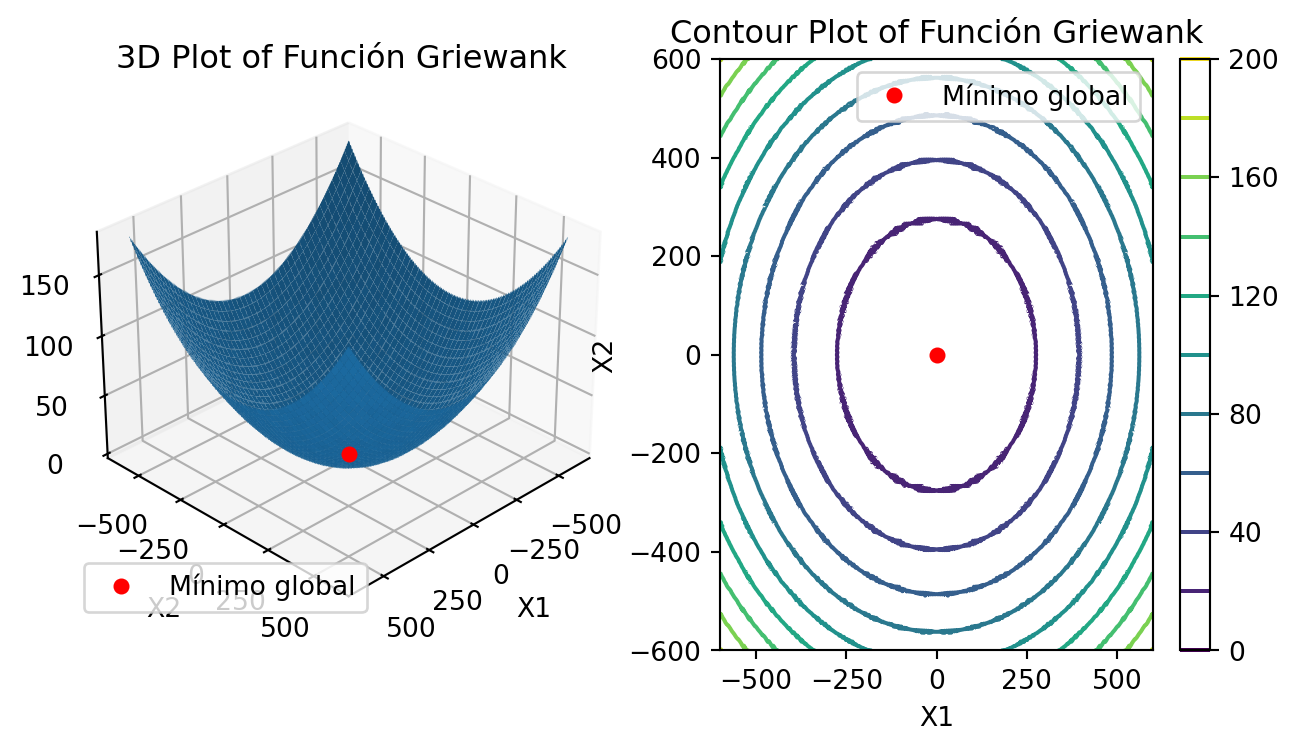

In [7]:
# Función de Griewank
def griewank(x):
    """
    Calcula el valor de la función Griewank.
    x: numpy array unidimensional (1D) o un array con forma (d, n1, n2) para evaluaciones vectorizadas.
    
    Retorna:
    - Un valor escalar si `x` es 1D.
    - Una matriz (n1, n2) si `x` tiene forma (d, n1, n2).
    """
    x = np.asarray(x)

    if x.ndim == 1:
        # Caso 1D: calcular para un solo vector
        d = len(x)
        sum_term = np.sum(x**2) / 4000
        product_term = np.prod(np.cos(x / np.sqrt(np.arange(1, d + 1))))
        return 1 + sum_term - product_term

    elif x.ndim == 3:
        # Caso ND: calcular para una cuadrícula (vectorizado)
        d = x.shape[0]
        i_indices = np.arange(1, d + 1).reshape(-1, 1, 1)
        sum_term = np.sum(x**2, axis=0) / 4000
        product_term = np.prod(np.cos(x / np.sqrt(i_indices)), axis=0)
        return 1 + sum_term - product_term

    else:
        raise ValueError("La entrada debe ser un array 1D o un array con forma (d, n1, n2).")
plot_function(griewank, x1_range=(-600, 600), x2_range=(-600, 600), title="Función Griewank", x1_point=0, x2_point=0)

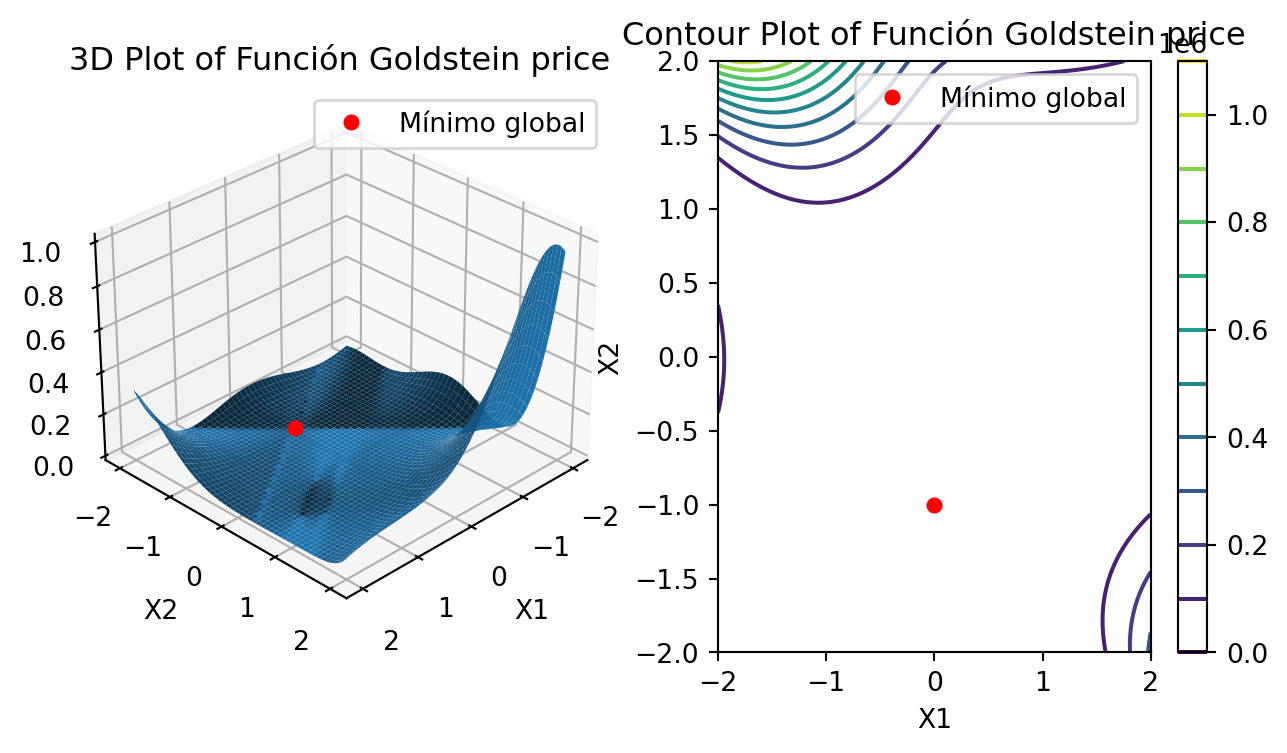

In [8]:
# Función Goldstein-Price
def goldstein_price(x):
    """
    Calcula el valor de la función Goldstein-Price.
    x1, x2: coordenadas en 2D
    """
    x1=x[0]
    x2=x[1]
    term1 = (1 + (x1 + x2 + 1)**2 * (19 - 14 * x1 + 3 * x1**2 - 14 * x2 + 6 * x1 * x2 + 3 * x2**2))
    term2 = (30 + (2 * x1 - 3 * x2)**2 * (18 - 32 * x1 + 12 * x1**2 + 48 * x2 - 36 * x1 * x2 + 27 * x2**2))
    return term1 * term2
plot_function(goldstein_price, x1_range=(-2, 2), x2_range=(-2, 2), title="Función Goldstein price", x1_point=0, x2_point=-1)

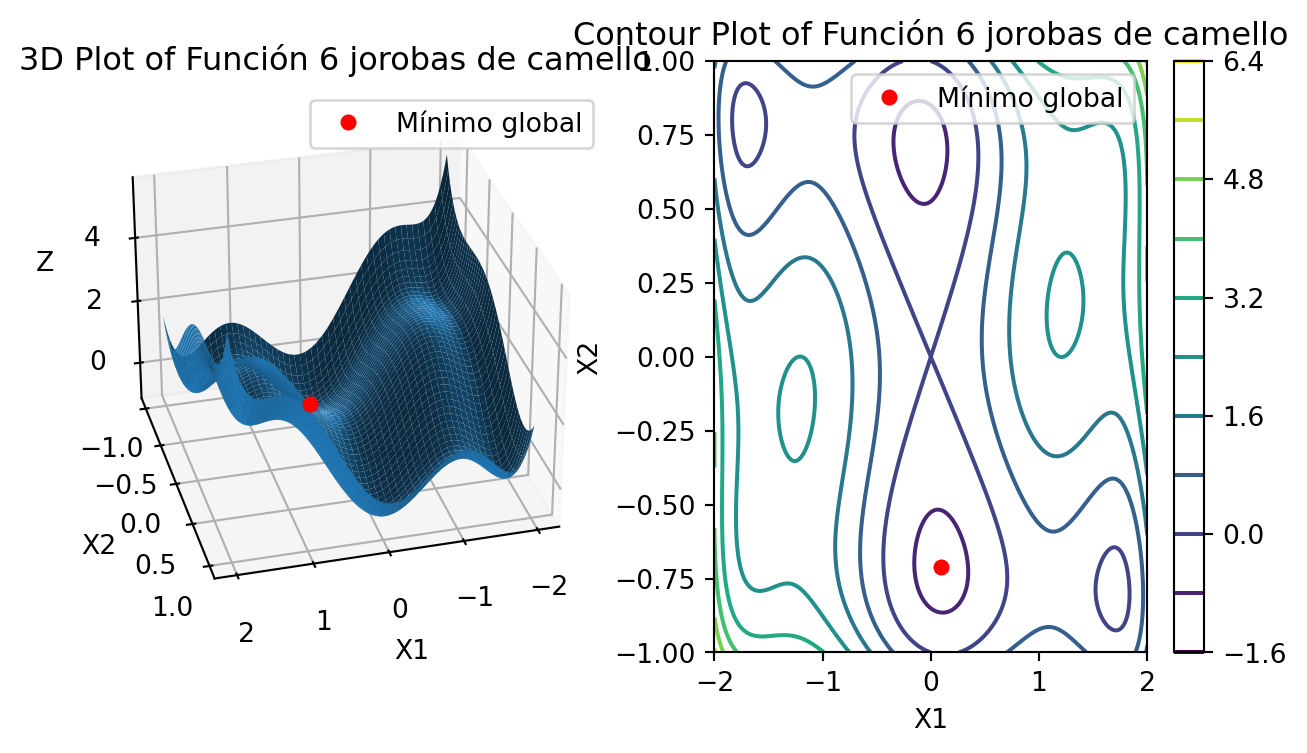

In [9]:
# Función de las seis jorobas de camello
def camel_six_humps(x):
    """
    Calcula el valor de la función de las seis jorobas de camello.
    x1, x2: coordenadas en 2D
    """
    x1 = x[0]
    x2 = x[1]
    term1 = (4 - 2.1 * x1**2 + x1**4 / 3) * x1**2
    term2 = x1 * x2
    term3 = (-4 + 4 * x2**2) * x2**2
    return term1 + term2 + term3
plot_function(camel_six_humps, x1_range=(-2, 2), x2_range=(-1, 1), title="Función 6 jorobas de camello", x1_point=0.0898, x2_point=-0.7126, elev=30, azim=75 )

In [10]:
def partial_derivative(x0, func, i, h, *args):
  e = np.zeros(len(x0))
  e[i] = 1
  return (func(x0+h*e, *args) - func(x0-h*e, *args))/(2*h)

def numerical_gradient(x0, func, h, *args):
  gradient = np.zeros(len(x0))
  for i in range(len(x0)):
    gradient[i] = partial_derivative(x0, func, i, h, *args)
  return gradient

def gradient_descent_num_dev_mult(x0, eta, func, h, max_iter, *args):
  """
  Perform gradient descent with numerical derivatives for a multi-dimensional function.

  Parameters:
      x0 (array-like): Initial guess for the variables.
      eta (float): Learning rate.
      func (callable): Function to minimize.
      h (float): Step size for numerical gradient calculation.
      max_iter (int): Maximum number of iterations.
      *args: Additional arguments for the function.

  Returns:
      result_df (pd.DataFrame): DataFrame with columns ['x1', 'x2', 'f(x1,x2)']
                                containing the trajectory of points.
  """
  x_old = np.array(x0)
  x_hist = []  # List to store the history of x and f(x)

  for i in range(max_iter):
      # Calculate the gradient numerically
      gradient = numerical_gradient(x_old, func, h, *args)

      # Update x based on gradient descent rule
      x_new = x_old - eta * gradient

      # Append current x and function value to history
      x_hist.append([x_old[0], x_old[1], func(x_old, *args)])

      # Update x_old
      x_old = x_new

  # Add the final position and function value
  x_hist.append([x_new[0], x_new[1], func(x_new, *args)])

  # Convert history to a pandas DataFrame
  result_df = pd.DataFrame(x_hist, columns=['x1', 'x2', 'f(x1,x2)'])

  return result_df

In [11]:
# Inicializar población
def initialize_population(size, dim, bounds):
    return np.random.uniform(bounds[0], bounds[1], (size, dim))

In [12]:
# Evaluar fitness
def evaluate_fitness(population,fitness_function):
    return np.array([fitness_function(ind) for ind in population])

In [13]:
# Selección por torneo
def tournament_selection(population, fitness, k=3):
    selected = []
    for _ in range(len(population)):
        candidates = np.random.choice(range(len(population)), k, replace=False)
        winner = candidates[np.argmin(fitness[candidates])]
        selected.append(population[winner])
    return np.array(selected)

In [14]:
# Cruce
def crossover(parent1, parent2, crossover_rate):
    if np.random.rand() < crossover_rate:
        point = np.random.randint(1, len(parent1))
        child = np.concatenate([parent1[:point], parent2[point:]])
        return child
    return parent1 if np.random.rand() < 0.5 else parent2

In [15]:
# Mutación
def mutate(individual, bounds, mutation_rate, delta):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] += np.random.uniform(-delta, delta)
            individual[i] = np.clip(individual[i], bounds[0], bounds[1])
    return individual

In [16]:
# Algoritmo completo
def genetic_algorithm(fitness_function, population_size, generations, mutation_rate, crossover_rate, dim, bounds, delta):
    population = initialize_population(population_size, dim, bounds)
    best_individual = None
    trajectory = []
    populations = []

    for generation in range(generations):
        populations.append(population.copy())
        fitness = evaluate_fitness(population, fitness_function)
        
        if best_individual is None or np.min(fitness) < fitness_function(best_individual):
            best_individual = population[np.argmin(fitness)]
        
        # Guardar la mejor solución de esta generación
        trajectory.append((*best_individual, fitness_function(best_individual)))
        
        # Selección
        selected_population = tournament_selection(population, fitness)
        
        # Cruce y mutación
        new_population = []
        for i in range(0, len(selected_population), 2):
            if i + 1 < len(selected_population):
                child1 = crossover(selected_population[i], selected_population[i+1], crossover_rate)
                child2 = crossover(selected_population[i+1], selected_population[i], crossover_rate)
                new_population.extend([child1, child2])
            else:
                new_population.append(selected_population[i])
        
        population = np.array([mutate(ind, bounds, mutation_rate, delta) for ind in new_population])
    
    # Convertir la trayectoria a DataFrame
    
    columns = [f'x{i+1}' for i in range(dim)] + ['f(x)']
    df = pd.DataFrame(trajectory, columns=columns)
    return best_individual, fitness_function(best_individual), df, populations

In [17]:
def initialize_population(self):
    """
    Inicializa la población de manera aleatoria dentro de los límites especificados

    Returns:
    - Matriz numpy con población inicial
    """
    # Crea una matriz de ceros con el tamaño de la población
    population = np.zeros((self.population_size, self.dimension))

    # Genera valores aleatorios para cada dimensión
    for i in range(self.dimension):
        population[:, i] = np.random.uniform(
            self.bounds[i][0],  # Límite inferior
            self.bounds[i][1],  # Límite superior
            size=self.population_size  # Número de individuos
        )
    return population

In [18]:
        def mutation(self, population):
            """
            Aplica la estrategia de mutación DE/rand/1

            Parameters:
            - population: Población actual

            Returns:
            - Población mutada
            """
            # Crea una matriz para almacenar la población mutada
            mutation_pop = np.zeros_like(population)

            for i in range(self.population_size):
                # Selecciona tres individuos aleatorios diferentes
                candidates = list(range(self.population_size))
                candidates.remove(i)
                r1, r2, r3 = np.random.choice(candidates, 3, replace=False)

                # Genera un nuevo vector mediante mutación
                mutation_pop[i] = population[r1] + self.F * (population[r2] - 
                                                               population[r3])

                # Asegura que los valores estén dentro de los límites
                for j in range(self.dimension):
                    mutation_pop[i, j] = np.clip(
                        mutation_pop[i, j],
                        self.bounds[j][0],
                        self.bounds[j][1]
                    )

            return mutation_pop

In [19]:
        def crossover(self, population, mutation_pop):
            """
            Aplica el cruce binomial (crossover)

            Parameters:
            - population: Población actual
            - mutation_pop: Población mutada

            Returns:
            - Población de prueba tras el cruce
            """
            # Crea una matriz para almacenar la población de prueba
            trial_pop = np.zeros_like(population)

            for i in range(self.population_size):
                # Genera puntos de cruce basados en CR
                cross_points = np.random.rand(self.dimension) <= self.CR
                # Asegura al menos un punto de cruce
                cross_points[np.random.randint(0, self.dimension)] = True

                # Genera vector de prueba
                trial_pop[i] = np.where(cross_points, mutation_pop[i], population[i])

            return trial_pop

In [20]:
def selection(self, population, trial_pop):
    """
    Selección de los mejores individuos

    Parameters:
    - population: Población actual
    - trial_pop: Población de prueba

    Returns:
    - Nueva población y sus valores de aptitud
    """
    # Calcula la aptitud de la población actual y de prueba
    pop_fitness = np.array([self.func(ind) for ind in population])
    trial_fitness = np.array([self.func(ind) for ind in trial_pop])

    # Identifica qué individuos de prueba son mejores
    better_indices = trial_fitness < pop_fitness
    population[better_indices] = trial_pop[better_indices]

    return population, np.minimum(pop_fitness, trial_fitness)